In [60]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('./data/openpowerlifting.csv')
df

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,NaN,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.00,320.00,3,181.85


<h5>Check for some columns</h5>

In [62]:
def num_of_nan(df: pd.DataFrame) -> dict:
    nan_in_col = {}
    column_name = df.columns
    for index, name in enumerate(column_name):
        nan_num =df[name].isna().sum()
        nan_in_col[name] = nan_num
        print(f'{index}. in {name} number of nan rows is {nan_num}')

num_of_nan(df)
print(df.shape)


0. in MeetID number of nan rows is 0
1. in Name number of nan rows is 0
2. in Sex number of nan rows is 0
3. in Equipment number of nan rows is 0
4. in Age number of nan rows is 239267
5. in Division number of nan rows is 15843
6. in BodyweightKg number of nan rows is 2402
7. in WeightClassKg number of nan rows is 3812
8. in Squat4Kg number of nan rows is 385171
9. in BestSquatKg number of nan rows is 88343
10. in Bench4Kg number of nan rows is 384452
11. in BestBenchKg number of nan rows is 30050
12. in Deadlift4Kg number of nan rows is 383614
13. in BestDeadliftKg number of nan rows is 68567
14. in TotalKg number of nan rows is 23177
15. in Place number of nan rows is 1092
16. in Wilks number of nan rows is 24220
(386414, 17)


In [63]:
# I need to drop some columns from dataframe
#  Place_to_check = ['1', '2']
place_dict = {}
winers_list = ['1', '2', '3']
df = df.drop(columns=['Deadlift4Kg', 'Bench4Kg', 'Age', 'MeetID', 'Squat4Kg', 'Name'], axis=0)
df = df.dropna()
num_of_nan(df)

'''
#  df = df.loc[df['Place'].isin(Place_to_check)]
places = df['Place'].unique()
for ind, place in enumerate(places):
    if(place in winers_list):
        place_dict[place] = 1 # Призовые сеста
    else:
        place_dict[place] = 0 # Не призовые места

#  df['Place'] = df['Place'].map(place_dict)
df.Place = df.Place.replace(place_dict) 
'''
print(df.shape)

0. in Sex number of nan rows is 0
1. in Equipment number of nan rows is 0
2. in Division number of nan rows is 0
3. in BodyweightKg number of nan rows is 0
4. in WeightClassKg number of nan rows is 0
5. in BestSquatKg number of nan rows is 0
6. in BestBenchKg number of nan rows is 0
7. in BestDeadliftKg number of nan rows is 0
8. in TotalKg number of nan rows is 0
9. in Place number of nan rows is 0
10. in Wilks number of nan rows is 0
(269832, 11)


In [64]:
df

,Sex,Equipment,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,F,Wraps,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,F,Single-ply,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,F,Single-ply,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
5,F,Wraps,Open Senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40
6,F,Raw,Mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98
...,...,...,...,...,...,...,...,...,...,...,...
386379,M,Wraps,Elite,136.62,140,285.76,222.26,340.19,848.22,1,475.77
386380,M,Wraps,Elite,136.62,140,322.05,183.70,310.71,816.47,1,457.96
386381,M,Wraps,Elite,179.80,140+,385.55,208.65,344.73,938.94,1,505.40
386382,M,Wraps,Elite,145.97,140+,362.87,242.67,288.03,893.58,1,496.32


<h4>Delete all categorial features and work with ower</h4>

0. column Sex is object -> NOT
1. column Equipment is object -> NOT
2. column Division is object -> NOT
3. column BodyweightKg is float64 -> OK
4. column WeightClassKg is object -> NOT
5. column BestSquatKg is float64 -> OK
6. column BestBenchKg is float64 -> OK
7. column BestDeadliftKg is float64 -> OK
8. column TotalKg is float64 -> OK
9. column Place is int64 -> OK
10. column Wilks is float64 -> OK


,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks,Place
0,59.60,47.63,20.41,70.31,138.35,1,155.05,1
1,58.51,142.88,95.25,163.29,401.42,1,456.38,1
2,58.51,142.88,95.25,163.29,401.42,1,456.38,1
5,62.41,170.10,77.11,145.15,392.36,1,424.40,1
6,67.31,124.74,95.25,163.29,383.28,1,391.98,1
...,...,...,...,...,...,...,...,...
386379,136.62,285.76,222.26,340.19,848.22,1,475.77,1
386380,136.62,322.05,183.70,310.71,816.47,1,457.96,1
386381,179.80,385.55,208.65,344.73,938.94,1,505.40,1
386382,145.97,362.87,242.67,288.03,893.58,1,496.32,1


array([[<Axes: title={'center': 'Place'}>,
        <Axes: title={'center': 'Place'}>]], dtype=object)

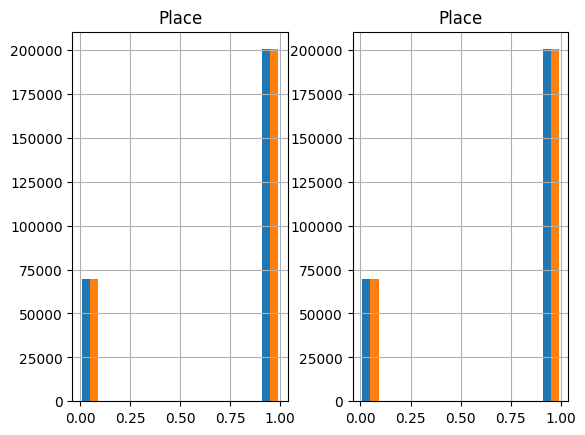

In [65]:
def Only_num_columns(df: pd.DataFrame, row_num: np.int32, colm_num: np.int8) -> pd.DataFrame:
    df_res = pd.DataFrame()
    names = df.columns
    is_norm = {'i':1, 'f':1, 'd':1, 'o':0, 's':0}
    for index, name in enumerate(names):
        local_type = str(df[name].dtype)
        if is_norm[local_type[0]]:
            print(f'{index}. column {name} is {local_type} -> OK')
            extracted = df[name]
            #print(extracted)
            df_res = pd.concat([df_res, df[name]], axis=1)
        else:
            print(f'{index}. column {name} is {local_type} -> NOT')

    return df_res

def convert_for_palace(df: pd.DataFrame, ln: np.int32) -> pd.DataFrame:

    return df

df_with_nums = pd.concat([Only_num_columns(df, df.shape[0], df.shape[1]), df['Place']], axis=1)
places = df['Place'].unique()
for ind, place in enumerate(places):
    if(place in winers_list):
        place_dict[place] = 1 # Призовые сеста
    else:
        place_dict[place] = 0 # Не призовые места

#  df['Place'] = df['Place'].map(place_dict)
df.Place = df.Place.replace(place_dict) 
display(df_with_nums)
# df = df.drop(df.columns['Place'],axis=1)
df_with_nums['Place'].hist()

<h4>Build regression and boost with them</h4>

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_with_nums.drop(columns='Place'),
                                        df_with_nums['Place'], test_size=0.33, random_state=42)

# Regression model
reg_md = LogisticRegression()

reg_md.fit(X_train, y_train)

y_pred = reg_md.predict(X_test)

ValueError: y should be a 1d array, got an array of shape (180787, 2) instead.

In [ ]:
cm = confusion_matrix(y_test, y_pred) 

  
print("Confusion Matrix:") 
print(cm) 
#print("ROC AUC:", roc_auc) 

Confusion Matrix:
[[43268     2]
 [14734     0]]
